Skin Cancer Classification Using Deep Learning

Import Libraries

In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Disable oneDNN optimizations for compatibility
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Set Dataset Path and Parameters

In [2]:
# Set the path to the dataset
train_data_path = '/kaggle/input/skin-cancer/skin_cancer_dataset/train'  # Path to training data
test_data_path = '/kaggle/input/skin-cancer/skin_cancer_dataset/test'      # Path to testing data

# Parameters
img_height, img_width = 224, 224  # Increased image dimensions
batch_size = 32  # Number of images to process at once
num_classes = 3  # Number of classes (benign, malignant, normal)

Data Augmentation and Loading Data

In [3]:
# Create ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Fill in new pixels created during transformations
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),  # Resize images
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical for multi-class
    shuffle=True  # Shuffle the training data
)

# Create ImageDataGenerator for validation data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

# Load validation data (using the same structure as training)
validation_generator = val_datagen.flow_from_directory(
    test_data_path,
    target_size=(img_height, img_width),  # Resize images
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical for multi-class
    shuffle=False  # No shuffling for validation
)

Found 3266 images belonging to 3 classes.
Found 794 images belonging to 3 classes.


Build the CNN Model

In [4]:
# Build the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(4, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model

In [5]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Train the Model

In [6]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=50,
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733070707.029897     108 service.cc:145] XLA service 0x796778003e00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733070707.029953     108 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/102 ━━━━━━━━━━━━━━━━━━━━ 22:03 13s/step - accuracy: 0.2500 - loss: 1.1060

I0000 00:00:1733070711.045356     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


102/102 ━━━━━━━━━━━━━━━━━━━━ 107s 934ms/step - accuracy: 0.4813 - loss: 1.0119 - val_accuracy: 0.6758 - val_loss: 0.7398
Epoch 2/50
  1/102 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6562 - loss: 0.7669

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6562 - loss: 0.7669 - val_accuracy: 0.6923 - val_loss: 0.8482
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 86s 773ms/step - accuracy: 0.6996 - loss: 0.6862 - val_accuracy: 0.7305 - val_loss: 0.6177
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6875 - loss: 0.6751 - val_accuracy: 0.9615 - val_loss: 0.2021
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 82s 746ms/step - accuracy: 0.7486 - loss: 0.5690 - val_accuracy: 0.7565 - val_loss: 0.5241
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7812 - loss: 0.4338 - val_accuracy: 0.9615 - val_loss: 0.2319
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 83s 767ms/step - accuracy: 0.7704 - loss: 0.5039 - val_accuracy: 0.7357 - val_loss: 0.5619
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6562 - loss: 0.5694 - val_accuracy: 0.8462 - val_loss: 0.4375
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 83s 766ms/step - accuracy: 0.7753 - loss: 0.4745 - val_accurac

Save the Trained Model

In [7]:
# Save the trained model
model.save('trained_model1.keras')

Evaluate the Model and Add Metrics

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 465ms/step - accuracy: 0.7984 - loss: 0.3816
Test Accuracy: 85.14%
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 407ms/step


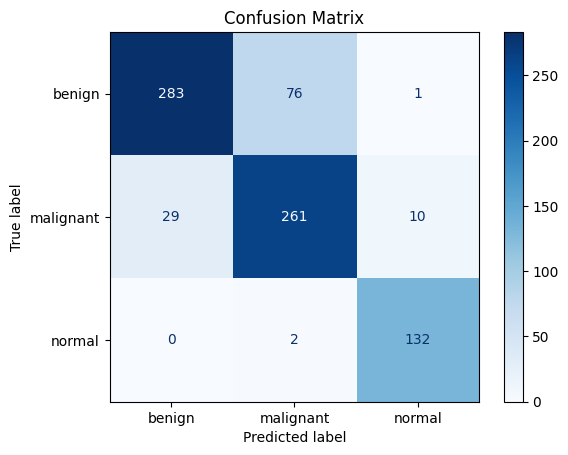

              precision    recall  f1-score   support

      benign       0.91      0.79      0.84       360
   malignant       0.77      0.87      0.82       300
      normal       0.92      0.99      0.95       134

    accuracy                           0.85       794
   macro avg       0.87      0.88      0.87       794
weighted avg       0.86      0.85      0.85       794



In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Predict the classes for the validation data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true classes
y_true = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

Plot Training & Validation Accuracy and Loss Values

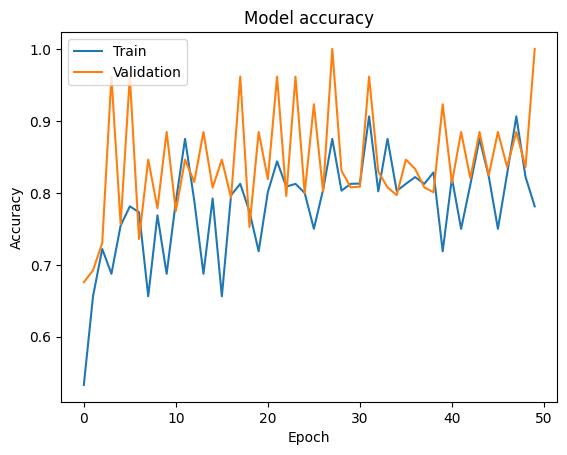

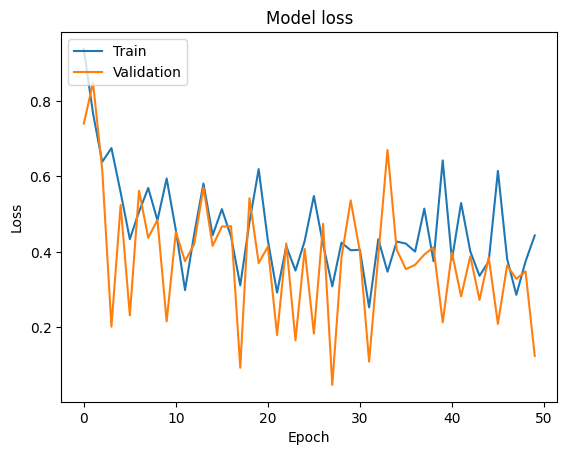

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Found 794 images belonging to 3 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 448ms/step - accuracy: 0.7984 - loss: 0.3816
Test Accuracy: 85.14%
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step


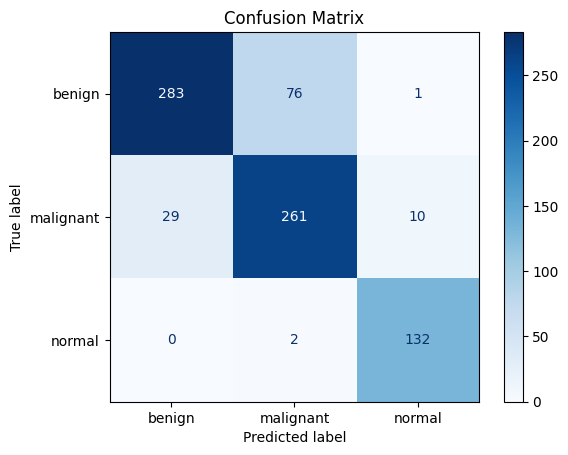

              precision    recall  f1-score   support

      benign       0.91      0.79      0.84       360
   malignant       0.77      0.87      0.82       300
      normal       0.92      0.99      0.95       134

    accuracy                           0.85       794
   macro avg       0.87      0.88      0.87       794
weighted avg       0.86      0.85      0.85       794

Accuracy: 85.14%
Precision: 85.79%
Recall: 85.14%
F1 Score: 85.14%


In [12]:
# Import necessary libraries
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set the path to the dataset and trained model
test_data_path = '/kaggle/input/skin-cancer/skin_cancer_dataset/test'
model_path = '/kaggle/working/trained_model1.keras'

# Parameters
img_height, img_width = 224, 224  # Image dimensions
batch_size = 32  # Number of images to process at once
num_classes = 3  # Number of classes (benign, malignant, normal)

# Load the trained model
model = load_model(model_path)

# Create ImageDataGenerator for test data (no augmentation, only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffling for test data
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Predict the classes for the test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true classes
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Calculate additional metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


In [18]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load your trained model
model = load_model('/kaggle/working/trained_model1.keras')

# Load and preprocess the image
img_path = '/kaggle/input/skin-cancer/skin_cancer_dataset/test/malignant/1027.jpg'
img = image.load_img(img_path, target_size=(224, 224)) # Adjust target size according to your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
img_array = img_array / 255.0 # Normalize the image if required

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=-1)

# Display the result
class_labels = ['Benign', 'Malignant', 'Normal'] # Replace with your actual class labels
print(f"Predicted class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Predicted class: Malignant
